In [1]:
import numpy as np
from numpy.random import rand, randn

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

In [2]:
n = 10000
# "truth" model (data)
x1 = randn(n)
x2 = 0.8 * randn(n) + 1 # model 1
x3 = 0.5 * randn(n) - 1 # model 3 components
x4 = 0.7 * randn(n) - 3
x5 = 5.0 * rand(n) - 0.5 

# range for data
h = 0.01
x = np.arange(-6, 6 + h, h)

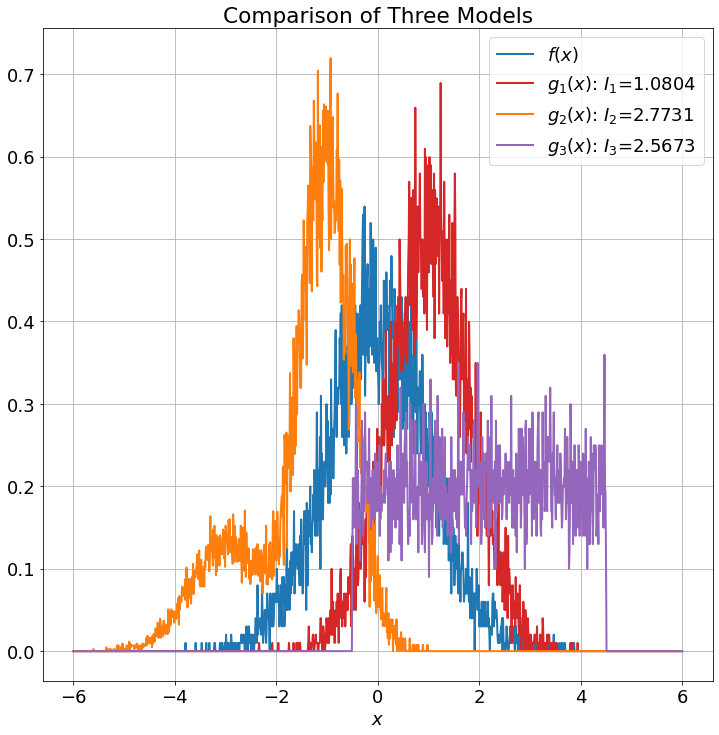

In [3]:
# Generate PDFs
# n+1 bin edges yield n bins
binedges = np.append(x - h/2, x[-1] + h/2)

f, _ = np.histogram(x1, bins=binedges)
g1, _ = np.histogram(x2, bins=binedges)
g2 = (
    np.histogram(x3, bins=binedges)[0] +
    0.3*np.histogram(x4, bins=binedges)[0]
)
g3, _ = np.histogram(x5, bins=binedges)

gs = [g1, g2, g3]

# Add floor to data
ϵ = 0.01
f = f + ϵ
gs = [g + ϵ for g in gs]

# Normalize data
f = f / np.trapz(f, x)
gs = [g / np.trapz(g, x) for g in gs]

# Compute KL divergences
klds = [
    np.trapz(f * np.log(f / g), x)
    for g in gs
]

# Plot
colors = ['C0', 'C3', 'C1', 'C4']
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(x, f,  linewidth=2, label='$f(x)$', color=colors[0])
for i, (g, kld) in enumerate(zip(gs, klds), 1):
    ax.plot(x, g, linewidth=2, label=f'$g_{i}(x)$: $I_{i}$={kld:0.4f}', color=colors[i])
ax.legend()
ax.set_xlabel('$x$')
ax.grid(True)
ax.set_title('Comparison of Three Models');